### Predicting the price of used cars using ANN

In [803]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [804]:
df = pd.read_csv('used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [805]:
df.shape

(4009, 12)

### Checking for null values

In [806]:
(df.isna().sum() / df.shape[0])*100

brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        4.240459
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         2.818658
clean_title     14.866550
price            0.000000
dtype: float64

In [807]:
df['clean_title'].value_counts()

clean_title
Yes    3413
Name: count, dtype: int64

In [808]:
df['clean_title'] = df['clean_title'].fillna('No')

In [809]:
df['clean_title'].value_counts()

clean_title
Yes    3413
No      596
Name: count, dtype: int64

In [810]:
df["accident"].value_counts()

accident
None reported                             2910
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [811]:
df.dropna(inplace=True)

In [812]:
(df.isna().sum() / df.shape[0])*100

brand           0.0
model           0.0
model_year      0.0
milage          0.0
fuel_type       0.0
engine          0.0
transmission    0.0
ext_col         0.0
int_col         0.0
accident        0.0
clean_title     0.0
price           0.0
dtype: float64

In [813]:
df.shape

(3730, 12)

### Checking for duplicates 

In [814]:
df[df.duplicated()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


In [815]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,"$34,999"


In [816]:
#dropping the model column

df.drop(columns='model',axis=1,inplace=True) 

#### Dropping years earlier than 2000

In [817]:
df = df[(df['model_year']>=2000)]

#### Creating 'OTHER' CATEGORY FOR the brands that occur really less in the data i.e less than 50 times

In [818]:
df.brand.value_counts()[df.brand.value_counts() > 50].sum()

np.int64(3213)

In [819]:
# Step 1: Count occurrences of each brand
brand_counts = df['brand'].value_counts()

# Step 2: Identify the brands with counts less than 50 (in this case, we're using a small example, but this can apply to large datasets as well)
brands_to_replace = brand_counts[brand_counts < 50].index

# Step 3: Replace those brands with 'OTHER'
df['brand'] = df['brand'].replace(brands_to_replace, 'OTHER')

# Step 4: Check the result (show counts after replacement)
brand_counts_after = df['brand'].value_counts()



In [820]:
df['brand'].value_counts()

brand
OTHER            403
BMW              360
Ford             352
Mercedes-Benz    305
Chevrolet        271
Audi             188
Toyota           188
Porsche          174
Lexus            158
Jeep             133
Land             125
Nissan           106
Cadillac         100
RAM               90
Dodge             88
GMC               87
Kia               71
Hyundai           65
Subaru            63
Acura             60
Honda             59
Mazda             58
INFINITI          56
Volkswagen        56
Lincoln           50
Name: count, dtype: int64

#### Cleaning the milage column

In [821]:
df["milage"] = df["milage"].str.replace(',' , '')

In [822]:
df["milage"] = df["milage"].str.replace('mi.' ,'')

In [823]:
df["milage"] = df["milage"].str.replace(' ' ,'')
df["milage"]  = df["milage"].str.strip()


In [824]:
df["milage"] = df["milage"].astype(int)

In [825]:
df["milage"].median()

np.float64(54321.5)

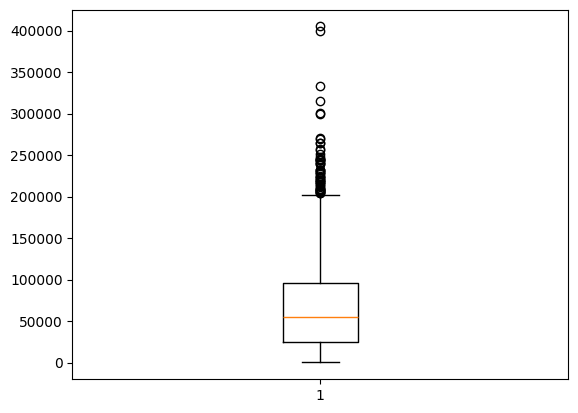

In [826]:
import  matplotlib.pyplot as plt

plt.boxplot(df['milage'])
plt.show()

### Removing the outliers from milage column

In [827]:
df = df[df['milage']<=200000]

In [828]:
df

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598"
3,INFINITI,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...
4003,Mercedes-Benz,2018,53705,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes,"$25,900"
4004,OTHER,2023,714,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,2022,10900,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4007,Ford,2020,33000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


### Dropping fuel_type which are not neccessary

In [829]:
df['fuel_type'].value_counts() >= 32

fuel_type
Gasoline           True
Hybrid             True
E85 Flex Fuel      True
Diesel             True
Plug-In Hybrid     True
–                 False
not supported     False
Name: count, dtype: bool

In [830]:
# Step 1: Get value counts for the 'fuel_type' column
fuel_type_counts = df['fuel_type'].value_counts()

# Step 2: Filter fuel types that appear 32 or more times
valid_fuel_types = fuel_type_counts[fuel_type_counts >= 32].index

# Step 3: Keep only the rows where the 'fuel_type' is in the valid_fuel_types
df = df[df['fuel_type'].isin(valid_fuel_types)]



In [831]:
df['fuel_type'].value_counts() 

fuel_type
Gasoline          3137
Hybrid             187
E85 Flex Fuel      128
Diesel             102
Plug-In Hybrid      33
Name: count, dtype: int64

In [832]:
df.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598"
3,INFINITI,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,"$34,999"


In [833]:
df['engine'].value_counts()

engine
2.0L I4 16V GDI DOHC Turbo                               52
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             46
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             46
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    42
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             42
                                                         ..
430.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel         1
341.0HP 6.0L 8 Cylinder Engine Flex Fuel Capability       1
245.0HP 2.5L 4 Cylinder Engine Gas/Electric Hybrid        1
444.0HP 5.0L 8 Cylinder Engine Gasoline Fuel              1
340.0HP 3.0L V6 Cylinder Engine Flex Fuel Capability      1
Name: count, Length: 1046, dtype: int64

In [834]:
df.isna().sum()

brand           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [835]:
df.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598"
3,INFINITI,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,"$34,999"


In [836]:
df['engine'].value_counts() 

engine
2.0L I4 16V GDI DOHC Turbo                               52
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             46
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             46
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    42
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             42
                                                         ..
430.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel         1
341.0HP 6.0L 8 Cylinder Engine Flex Fuel Capability       1
245.0HP 2.5L 4 Cylinder Engine Gas/Electric Hybrid        1
444.0HP 5.0L 8 Cylinder Engine Gasoline Fuel              1
340.0HP 3.0L V6 Cylinder Engine Flex Fuel Capability      1
Name: count, Length: 1046, dtype: int64

In [837]:
import re
# Function to extract the engine liter capacity
def extract_liter_capacity(engine_str):
    match = re.search(r'(\d+\.\d+|\d+)(?=L)', engine_str)  # Regex to find number(s) before 'L'
    if match:
        return float(match.group(1))  # Return as float
    return None  # Return None if no match

# Apply the function to create the new 'engine_liter_capacity' column
df['engine_liter_capacity'] = df['engine'].apply(extract_liter_capacity)

In [838]:
df['engine_liter_capacity'].fillna(df['engine_liter_capacity'].median(),inplace=True)

In [839]:
df['engine_liter_capacity'].isna().sum()

np.int64(0)

In [840]:
df.drop(columns ='engine',axis=1,inplace=True)

In [841]:
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = df['price'].str.strip()
df['price'] = df['price'].astype(int)

In [842]:
df.head()

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,engine_liter_capacity
0,Ford,2013,51000,E85 Flex Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300,3.7
1,Hyundai,2021,34742,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005,3.8
2,Lexus,2022,22372,Gasoline,Automatic,Blue,Black,None reported,No,54598,3.5
3,INFINITI,2015,88900,Hybrid,7-Speed A/T,Black,Black,None reported,Yes,15500,3.5
4,Audi,2021,9835,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,34999,2.0


In [843]:
df["transmission"].value_counts()

transmission
A/T                                                                 864
8-Speed A/T                                                         390
Transmission w/Dual Shift Mode                                      387
6-Speed A/T                                                         347
6-Speed M/T                                                         229
Automatic                                                           219
7-Speed A/T                                                         201
8-Speed Automatic                                                   168
10-Speed A/T                                                        115
5-Speed A/T                                                          76
9-Speed A/T                                                          71
6-Speed Automatic                                                    65
CVT Transmission                                                     61
10-Speed Automatic                                 

In [844]:
def extract_transmission_type(transmission):
        if 'Automatic' in transmission:
            return 'Automatic'
        elif 'Manual' in transmission:
            return 'Manual'
        elif 'CVT' in transmission:
            return 'CVT'
        elif 'DCT' in transmission:
            return 'DCT'
        elif 'Fixed Gear' in transmission:
            return 'Fixed Gear'
        elif 'Single-Speed' in transmission:
            return 'Single-Speed'
        else:
            return 'other'  

In [845]:
df["transmission"]  = df["transmission"].apply(lambda x : extract_transmission_type(x))

In [846]:
df["transmission"].value_counts()

transmission
other        2846
Automatic     665
CVT            62
Manual         14
Name: count, dtype: int64

In [847]:
df[df['price'] > 90000].count()

brand                    262
model_year               262
milage                   262
fuel_type                262
transmission             262
ext_col                  262
int_col                  262
accident                 262
clean_title              262
price                    262
engine_liter_capacity    262
dtype: int64

In [848]:
df = df[df['price'] <= 90000]

In [849]:
df[df['price'] > 90000].count()

brand                    0
model_year               0
milage                   0
fuel_type                0
transmission             0
ext_col                  0
int_col                  0
accident                 0
clean_title              0
price                    0
engine_liter_capacity    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1f2f2a3d1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f2f2a3cb60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f2f2a3d4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f2f2a3c710>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f2f2a3c230>],
 'means': []}

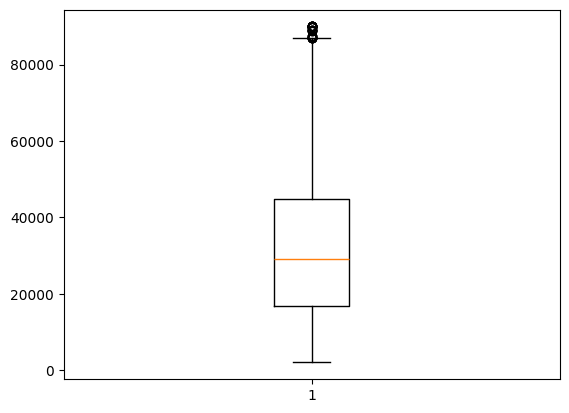

In [850]:
plt.boxplot(df['price'])

In [851]:
df['clean_title'] = df['clean_title'].apply(lambda x : 0 if x=='No' else 1)

In [852]:
df['clean_title'].value_counts()

clean_title
1    2933
0     392
Name: count, dtype: int64

In [853]:
df['accident'] = df['accident'].apply(lambda x : 0 if x=='None reported' else 1)

In [854]:
df['accident'].value_counts()

accident
0    2413
1     912
Name: count, dtype: int64

In [855]:
df['ext_col'].value_counts()

ext_col
Black                      769
White                      681
Gray                       407
Silver                     321
Blue                       295
                          ... 
Magnetic Gray Clearcoat      1
Mountain Air Metallic        1
Caspian Blue                 1
Black Raven                  1
Blue Reflex Mica             1
Name: count, Length: 260, dtype: int64

In [856]:
# function to categorize similar colors 

def categorize_color(color):
    color = color.lower()
    if any(x in color for x in ['black', 'obsidian', 'raven', 'onyx']):
        return 'Black'
    elif any(x in color for x in ['white', 'pearl', 'ivory', 'frost']):
        return 'White'
    elif any(x in color for x in ['blue', 'navy', 'aqua', 'teal']):
        return 'Blue'
    elif any(x in color for x in ['red', 'ruby', 'garnet']):
        return 'Red'
    elif any(x in color for x in ['silver', 'gray', 'grey', 'steel']):
        return 'Silver_Gray'
    elif any(x in color for x in ['green']):
        return 'Green'
    elif any(x in color for x in ['yellow', 'gold', 'orange']):
        return 'Yellow_Orange'
    else:
        return 'Other'

In [857]:
df['ext_col'] = df['ext_col'].apply(lambda x : categorize_color(x))


In [858]:
df['ext_col'].value_counts()

ext_col
Black            865
Silver_Gray      810
White            800
Blue             326
Red              239
Other            144
Yellow_Orange     92
Green             49
Name: count, dtype: int64

In [859]:
df['int_col'] = df['int_col'].apply(lambda x : categorize_color(x)) 

In [860]:
df['int_col'].value_counts()

int_col
Black            1821
Other             840
Silver_Gray       416
Red               112
White              80
Yellow_Orange      27
Blue               24
Green               5
Name: count, dtype: int64

In [861]:
df.head()

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,engine_liter_capacity
0,Ford,2013,51000,E85 Flex Fuel,other,Black,Black,1,1,10300,3.7
1,Hyundai,2021,34742,Gasoline,Automatic,Other,Silver_Gray,1,1,38005,3.8
2,Lexus,2022,22372,Gasoline,Automatic,Blue,Black,0,0,54598,3.5
3,INFINITI,2015,88900,Hybrid,other,Black,Black,0,1,15500,3.5
4,Audi,2021,9835,Gasoline,Automatic,White,Black,0,0,34999,2.0


#### Model Building ANN

In [862]:
X = df.drop(columns = 'price',axis=1)
y =  df['price']

In [863]:
#lets do train and test split

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.9,random_state=42)    

In [864]:
X_train.shape

(2992, 10)

In [865]:
y_train.shape

(2992,)

In [866]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# List of categorical and numerical columns
categorical_cols = ['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col']
numerical_cols = ['milage','model_year' ,'engine_liter_capacity']

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)  # Apply OneHotEncoder to categorical columns
    ])

# Apply the transformations on both training and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convert transformed arrays back to DataFrame for easy viewing
# Get the feature names after one-hot encoding
cat_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)
feature_names = numerical_cols + list(cat_feature_names)

# Convert the numpy arrays into DataFrames
X_train_final = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_final = pd.DataFrame(X_test_transformed, columns=feature_names)




In [867]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
target_scaler = StandardScaler()

# Fit and transform the target column
# Convert the target variable to a NumPy array and reshape it
y_train_final = target_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_final = target_scaler.transform(y_test.to_numpy().reshape(-1, 1))

In [868]:
X_train_final

,milage,model_year,engine_liter_capacity,brand_Audi,brand_BMW,brand_Cadillac,brand_Chevrolet,brand_Dodge,brand_Ford,brand_GMC,...,ext_col_Silver_Gray,ext_col_White,ext_col_Yellow_Orange,int_col_Blue,int_col_Green,int_col_Other,int_col_Red,int_col_Silver_Gray,int_col_White,int_col_Yellow_Orange
0,-0.364717,0.093681,-0.456415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.787301,-0.088446,-0.094304,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.139624,-0.634827,1.861096,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.824059,1.368570,1.209296,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.841624,-0.270573,-1.325482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,2.496559,-0.816954,1.498985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2988,2.840442,-0.816954,-0.094304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2989,1.626106,-1.181208,-1.542748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2990,-0.795473,1.004316,-0.094304,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [869]:
y_train_final

array([[-0.56389869],
       [-0.78630032],
       [-0.28842395],
       ...,
       [-1.29686368],
       [ 1.14601599],
       [-0.10398224]])

In [870]:
X_test.shape

(333, 10)

In [871]:
y_test.shape

(333,)

### Tensorflow and keras HyperParameter tuning

In [872]:
import keras_tuner
import keras

In [873]:
def build_model(hp):
    model = keras.Sequential()
  
    model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32,64,128,256]),
      hp.Choice("activation ", ['relu','sigmoid','softmax'])
      )
       )
  
    model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32,64,128,256]),
      activation=hp.Choice('activation', ['relu', 'sigmoid','softmax'])))
  
    model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32,64,128,256]),
      activation=hp.Choice('activation', ['relu', 'sigmoid','softmax'])))
   
  
    model.add(keras.layers.Dense(1))

    model.compile(loss='mean_squared_error')
  
    return model

In [874]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10)

Reloading Tuner from .\untitled_project\tuner0.json


In [875]:
tuner.search(X_train_final, y_train_final, epochs=5, validation_split=0.2)
best_model = tuner.get_best_models()[0]

Trial 10 Complete [00h 00m 04s]
val_loss: 0.2643304467201233

Best val_loss So Far: 0.22945097088813782
Total elapsed time: 00h 18m 07s


In [876]:
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]


In [877]:
best_hyperparameters = best_trial.hyperparameters.values


In [878]:
print("Best Hyperparameters:")
for key, value in best_hyperparameters.items():
    print(f"{key}: {value}")

# Optionally, get the best model
best_model = tuner.get_best_models()[0]

# Summary of the best model
best_model.summary()

Best Hyperparameters:
units: 128
activation : relu
activation: sigmoid


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,425 (154.00 KB)

 Trainable params: 39,425 (154.00 KB)

 Non-trainable params: 0 (0.00 B)

In [879]:

# Now, get the best model
best_model = tuner.get_best_models()[0]

# Inspect the layers of the best model and print out the hyperparameters for each layer
print("\nBest Model's Layer Details:")
for layer in best_model.layers:
    if isinstance(layer, keras.layers.Dense):
        print(f"Layer: {layer.name}")
        print(f"  - Units: {layer.units}")
        print(f"  - Activation: {layer.activation.__name__}")
        # print(f"  - Input shape: {layer.input_shape}")
        # print(f"  - Output shape: {layer.output_shape}")
        print()


Best Model's Layer Details:
Layer: dense
  - Units: 128
  - Activation: relu

Layer: dense_1
  - Units: 128
  - Activation: sigmoid

Layer: dense_2
  - Units: 128
  - Activation: sigmoid

Layer: dense_3
  - Units: 1
  - Activation: linear



In [898]:
# Get the best model after hyperparameter tuning
best_model = tuner.get_best_models()[0]

# Compile the best model (if necessary)
best_model.compile(optimizer='adam',  # You can use 'adam' or the optimizer that was selected during tuning
                   loss='mean_squared_error',  # regression problem
                   metrics=['r2_score' ])

# Now, train the best model
history = best_model.fit(X_train_final, y_train_final, 
                         epochs=30,  # Choose the number of epochs
                        #  batch_size=32,  # You can adjust the batch size
                        #  validation_data=(X_val, y_val),  # Optional: Use validation data if available
                        #  class_weight={0: 1, 1: 5})  # Adjust class_weight if dealing with imbalanced classes
)



Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2488 - r2_score: 0.7489
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2352 - r2_score: 0.7630
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2146 - r2_score: 0.7872
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1973 - r2_score: 0.8058
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2021 - r2_score: 0.7912
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1882 - r2_score: 0.8108
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2138 - r2_score: 0.7860
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1907 - r2_score: 0.8019
Epoch 9/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1975 - r2_score: 0.8014
Epoch 10/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1901 - r2_score: 0.8132
Epoch 11/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1764 - r2_score: 0.8337
Epoch 12/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1623 - r2_sco

In [892]:
y_pred_scaled = best_model.predict(X_test_final)
y_pred = target_scaler.inverse_transform(y_pred_scaled)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [893]:
from sklearn.metrics import r2_score , mean_squared_error
r2_score(y_pred_scaled , y_test_final)

0.6060748389382554

In [894]:
mean_squared_error(y_test,y_pred_scaled)

1501087104.0